<a href="https://colab.research.google.com/github/hyweisky/gwings/blob/master/DependencyScheduler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import defaultdict
import networkx as nx # Library for displaying graphs.
import matplotlib.pyplot as plt

class DependencyScheduler(object):

    def __init__(self):
        self.tasks = set()
        # The successors of a task are the tasks that depend on it, and can
        # only be done once the task is completed.
        self.successors = defaultdict(set)
        # The predecessors of a task have to be done before the task.
        self.predecessors = defaultdict(set)
        self.completed_tasks = set() # completed tasks

    def add_task(self, t, dependencies):
        """Adds a task t with given dependencies."""
        # Makes sure we know about all tasks mentioned.
        assert t not in self.tasks or len(self.predecessors[t]) == 0, "The task was already present."
        self.tasks.add(t)
        self.tasks.update(dependencies)
        # The predecessors are the tasks that need to be done before.
        self.predecessors[t] = set(dependencies)
        # The new task is a successor of its dependencies.
        for u in dependencies:
            self.successors[u].add(t)

    def reset(self):
        self.completed_tasks = set()

    @property
    def done(self):
        return self.completed_tasks == self.tasks


    def show(self):
        """We use the nx graph to display the graph."""
        g = nx.DiGraph()
        g.add_nodes_from(self.tasks)
        g.add_edges_from([(u, v) for u in self.tasks for v in self.successors[u]])
        node_colors = ''.join([('g' if v in self.completed_tasks else 'r')
                           for v in self.tasks])
        nx.draw(g, with_labels=True, node_color=node_colors)
        plt.show()

    @property
    def uncompleted(self):
        """Returns the tasks that have not been completed.
        This is a property, so you can say scheduler.uncompleted rather than
        scheduler.uncompleted()"""
        return self.tasks - self.completed_tasks

    def _check(self):
        """We check that if t is a successor of u, then u is a predecessor
        of t."""
        for u in self.tasks:
            for t in self.successors[u]:
                assert u in self.predecessors[t]



Question 1: implement available_tasks and mark_completed.

### Implementation of `available_tasks` and `mark_completed`.


In [ ]:
def scheduler_available_tasks(self):
    """Returns the set of tasks that can be done in parallel.
    A task can be done if all its predecessors have been completed.
    And of course, we don't return any task that has already been
    completed."""
    ### YOUR CODE HERE
    av_task = set()
    for t in self.tasks:
        if t not in self.predecessors.keys() or len(self.predecessors[t]) == 0:
            av_task.add(t)
    return av_task - self.completed_tasks

def scheduler_mark_completed(self, t):
    """Marks the task t as completed, and returns the additional
    set of tasks that can be done (and that could not be
    previously done) once t is completed."""
    ### YOUR CODE HERE
    self.completed_tasks.add(t)
    for k in self.predecessors.keys():
        if t in self.predecessors[k]:
            self.predecessors[k].remove(t)
    resset = set()
    sucset = self.successors[t]
    if len(sucset) > 0:
        for suc in sucset:
            if suc not in self.predecessors.keys() or len(self.predecessors[suc]) == 0:
                resset.add(suc)
    return resset

DependencyScheduler.available_tasks = property(scheduler_available_tasks)
DependencyScheduler.mark_completed = scheduler_mark_completed

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:478: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


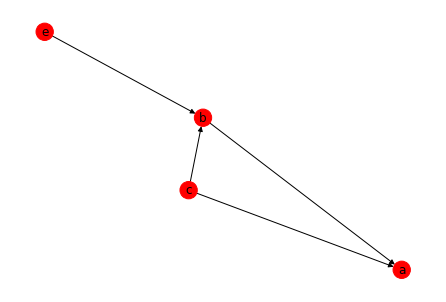

{'1'}

In [ ]:
# Here is a place where you can test your code. 

### YOUR CODE HERELet us check if this works.
s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
s.add_task('b', ['c', 'e'])
s._check()
s.show()
# print(s.uncompleted)
# print(s.predecessors)
# print(s.tasks)
# print(s.successors)
# a=set([1,2])
# b=set([2,1])
# print(a,b)
# print(a==b)
# print(s.available_tasks)
s=DependencyScheduler()
s.add_task('1',[])
# s.add_task('3',['1'])

# s.mark_completed('2')
# s.mark_completed('3')
s.mark_completed('2')
s.available_tasks
# s.available_tasks
# s.predecessors
# s._check()

In [ ]:
### Simple tests. 5 points. 

s = DependencyScheduler()
s.add_task('a', [])
assert s.available_tasks == {'a'}

s = DependencyScheduler()
assert s.available_tasks == set()


In [ ]:


### Slightly more complicated. 4 points. 

s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
s.add_task('b', ['c', 'e'])
assert s.available_tasks == {'e', 'c'}

s = DependencyScheduler()
s.add_task('a', ['b'])
s.add_task('b', ['a'])
assert s.available_tasks == set()

In [ ]:
### Now, let's test `mark_completed`.  Simple tests first. 2 points. 

s = DependencyScheduler()
s.add_task('a', [])
assert s.available_tasks, {'a'}
r = s.mark_completed('a')
assert r == set()

s = DependencyScheduler()
s.add_task('a', ['b'])
assert s.available_tasks == {'b'}
r = s.mark_completed('b')
assert r == {'a'}

### Hidden tests.  3 points. 
s = DependencyScheduler()
s.add_task('a', ['b'])
s.add_task('b',[1,2,3])
print(s.available_tasks)
r = s.mark_completed('b')#b is completed ,Q:1,2,3是否应该也算是已经完成。
print(s.available_tasks)
assert r == {'a'}

{1, 2, 3}
{'a', 1, 2, 3}


In [ ]:
### Slightly more complicated. 4 points. 

def assert_equal(a, b):
    assert a == b

s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
assert_equal(s.available_tasks, {'b', 'c'})
r = s.mark_completed('b')
assert_equal(r, set())
assert_equal(s.available_tasks, {'c'})
r = s.mark_completed('c')
assert_equal(r, {'a'})

s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
s.add_task('b', ['c', 'e'])
s.add_task('c', [])
assert_equal(s.available_tasks, {'c', 'e'})
r = s.mark_completed('e')
assert_equal(r, set())
r = s.mark_completed('c')
assert_equal(r, {'b'})
r = s.mark_completed('b')
assert_equal(r, {'a'})
r = s.mark_completed('a')
assert_equal(r, set())
assert_equal(s.available_tasks, set())


### Hidden tests. 6 points. 

Executing the tasks
Here is an execution engine for our tasks with dependencies.

In [ ]:
import random

def execute_schedule(s, show=False):
    s.reset()
    in_process = s.available_tasks
    print("Starting by doing:", in_process)
    while len(in_process) > 0:
        # Picks one random task to be the first to be completed.
        t = random.choice(list(in_process))
        print("Completed:", t)
        in_process = in_process - {t} | s.mark_completed(t)
        print("Now doing:", in_process)
        if show:
            s.show()
    # Have we done all?
    if not s.done:
        print("Error, there are tasks that could not be completed:", s.uncompleted)

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:478: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


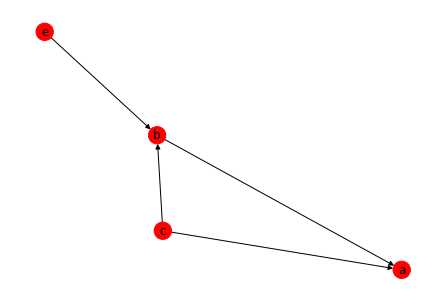

Starting by doing: {'e', 'c'}
Completed: c
Now doing: {'e'}


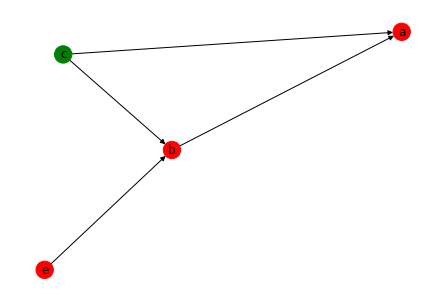

Completed: e
Now doing: {'b'}


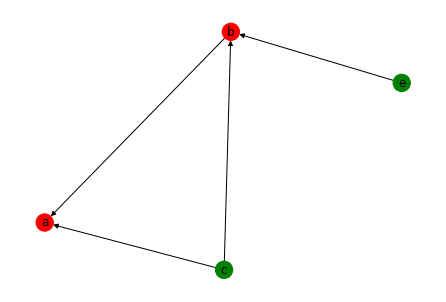

Completed: b
Now doing: {'a'}


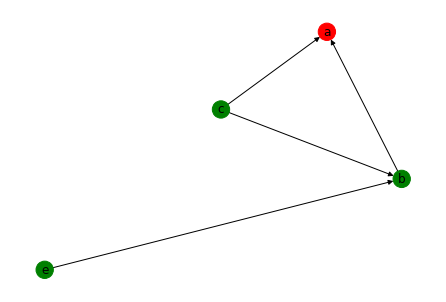

Completed: a
Now doing: set()


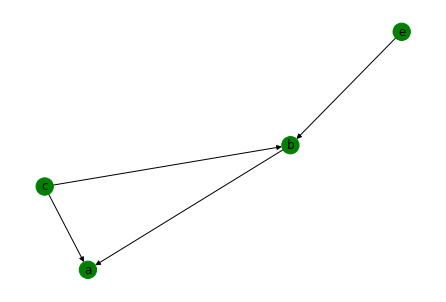

In [ ]:
#Let's try it on our old schedule:

s = DependencyScheduler()
s.add_task('a', ['b', 'c'])
s.add_task('b', ['c', 'e'])
s._check()
s.show()
execute_schedule(s, show=True)

In [ ]:
#What happens if there is a loop?

s = DependencyScheduler()
s.add_task('a', ['b'])
s.add_task('b', ['a'])
s.add_task('c', ['a'])
execute_schedule(s)

Starting by doing: set()
Error, there are tasks that could not be completed: {'a', 'c', 'b'}


In [ ]:
#Ok, this is reasonable! Let us now encode our Carbonara pasta recipe.

carbonara = DependencyScheduler()

# First, the part about cooking the pancetta.
carbonara.add_task('dice onions', [])
carbonara.add_task('dice pancetta', [])
carbonara.add_task('put oil and butter in pan', [])
carbonara.add_task('put pancetta in pan', ['dice pancetta'])
carbonara.add_task('put onions in pan', ['dice onions'])
carbonara.add_task('cook pancetta', ['put oil and butter in pan',
                                     'put pancetta in pan',
                                     'put onions in pan'])

In [ ]:
# Second, the part about beating the eggs.
carbonara.add_task('put eggs in bowl', [])
carbonara.add_task('beat eggs', ['put eggs in bowl'])

In [ ]:
# Third, cooking the pasta.
carbonara.add_task('fill pot with water', [])
carbonara.add_task('bring pot of water to a boil', ['fill pot with water'])
carbonara.add_task('add salt to water', ['bring pot of water to a boil'])
carbonara.add_task('put pasta in water', ['bring pot of water to a boil',
                                         'add salt to water'])
carbonara.add_task('colander pasta', ['put pasta in water'])

In [ ]:
# And finally, we can put everything together.
carbonara.add_task('serve', ['beat eggs', 'cook pancetta', 'colander pasta'])

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:478: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


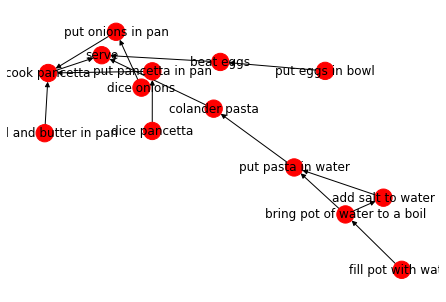

In [ ]:
# Let's look at our schedule!
carbonara.show()


In [ ]:
# And let's finally prepare carbonara!
execute_schedule(carbonara)

Starting by doing: {'put oil and butter in pan', 'fill pot with water', 'put eggs in bowl', 'dice onions', 'dice pancetta'}
Completed: put eggs in bowl
Now doing: {'put oil and butter in pan', 'fill pot with water', 'dice onions', 'beat eggs', 'dice pancetta'}
Completed: fill pot with water
Now doing: {'put oil and butter in pan', 'dice onions', 'beat eggs', 'bring pot of water to a boil', 'dice pancetta'}
Completed: bring pot of water to a boil
Now doing: {'put oil and butter in pan', 'add salt to water', 'dice onions', 'beat eggs', 'dice pancetta'}
Completed: dice pancetta
Now doing: {'put oil and butter in pan', 'add salt to water', 'dice onions', 'beat eggs', 'put pancetta in pan'}
Completed: add salt to water
Now doing: {'put oil and butter in pan', 'dice onions', 'beat eggs', 'put pancetta in pan', 'put pasta in water'}
Completed: put pancetta in pan
Now doing: {'dice onions', 'put oil and butter in pan', 'beat eggs', 'put pasta in water'}
Completed: put pasta in water
Now doing:

In [ ]:
def execute_schedule(s, show=False):
    s.reset()
    in_process = s.available_tasks
    print("Starting by doing:", in_process)
    while len(in_process) > 0:
        # Picks one random task to be the first to be completed.
        t = random.choice(list(in_process))
        print("Completed:", t)
        in_process = in_process - {t} | s.mark_completed(t)
        print("Now doing:", in_process)
        if show:
            s.show()
    # Have we done all?
    if not s.done:
        print("Error, there are tasks that could not be completed:", s.uncompleted)

In [ ]:
class RunSchedule(object):

    def __init__(self, scheduler):
        self.scheduler = scheduler
        self.in_process = None # Indicating, we don't know yet.

    def reset(self):
        self.scheduler.reset()
        self.in_process = None

    def step(self):
        """Performs a step, returning the task, if any, or None,
        if there is no step that can be done."""
        # If we don't know what steps are in process, we get them.
        if self.in_process is None:
            self.in_process = self.scheduler.available_tasks
        if len(self.in_process) == 0:
            return None
        t = random.choice(list(self.in_process))
        self.in_process = self.in_process - {t} | self.scheduler.mark_completed(t)
        return t

    @property
    def done(self):
        return self.scheduler.done

    def run(self):
        """Runs the scheduler from the current configuration to completion.
        You must call reset() first, if you want to run the whole schedule."""
        tasks = []
        while not self.done:
            t = self.step()
            if t is not None:
                tasks.append(t)
        return tasks



In [ ]:

#We can run our pasta carbonara with this RunSchedule class:

runner = RunSchedule(carbonara)
runner.reset()
runner.run()

['colander pasta',
 'serve',
 'put eggs in bowl',
 'bring pot of water to a boil',
 'cook pancetta',
 'put pancetta in pan',
 'cook pancetta',
 'put pasta in water',
 'beat eggs',
 'dice onions',
 'put oil and butter in pan',
 'dice pancetta',
 'colander pasta',
 'cook pancetta',
 'put pancetta in pan',
 'serve',
 'cook pancetta',
 'add salt to water',
 'put pasta in water',
 'fill pot with water',
 'bring pot of water to a boil',
 'colander pasta',
 'put pasta in water',
 'add salt to water',
 'put onions in pan']

# Question 2: redo for code

In [ ]:
### Implementation of `redo`
def dependency_scheduler_redo(self, t):
    """Mark the task t, and all its successors, as undone.
    Returns the set of successor tasks of t, with t included."""
    ### YOUR CODE HERE
    if t in self.completed_tasks:
        self.completed_tasks.remove(t)
    if t in self.successors.keys():
        ss = self.successors[t]
        if len(ss) > 0:
            for s in ss:
                dependency_scheduler_redo(self, s)
                self.predecessors[s].add(t)

DependencyScheduler.redo = dependency_scheduler_redo

### YOUR CODE HERE

Let us test the implementation.

In [ ]:
### Tests for `redo` for code. 5 points. 
def assert_equal(a,b):
  assert a==b

s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', ['a'])
s.add_task('c', ['a'])
s.add_task('d', ['b', 'c'])
s.add_task('e', ['a', 'd'])

s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
assert_equal(s.available_tasks, {'d'})
s.redo('b')
assert_equal(s.available_tasks, {'b'})

In [ ]:
# Additional test
s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', ['a'])
s.add_task('c', ['a'])
s.add_task('d', ['b', 'c'])
s.add_task('e', ['a', 'd'])

s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
s.mark_completed('d')
s.redo('a')
assert_equal(s.available_tasks, {'a'})

s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', ['a'])
s.add_task('c', ['a'])
s.add_task('d', ['b', 'c'])
s.add_task('e', ['a', 'd'])
s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
assert_equal(s.available_tasks, {'d'})
s.mark_completed('d')
s.mark_completed('e')
s.redo('e')
assert_equal(s.available_tasks, {'e'})

### Hidden tests.  5 points. 

# Next, we implement a runner that has an additional operation redo(t) for a task t.

In [ ]:
def run_schedule_redo(self, t):
    """Marks t as to be redone."""
    # We drop everything that was in progress.
    # This also forces us to ask the scheduler for what to redo.
    self.in_process = None
    return self.scheduler.redo(t)

RunSchedule.redo = run_schedule_redo

In [ ]:
#We can now play with it.

runner = RunSchedule(carbonara)
runner.reset()
for _ in range(10):
    print(runner.step())
print("---> readd salt")
print("marking undone:", runner.redo("add salt to water"))
print("completed:", runner.scheduler.completed_tasks)
for _ in range(10):
    print(runner.step())
print("--->redo dice pancetta")
print("marking undone:", runner.redo("dice pancetta"))
print("completed:", runner.scheduler.completed_tasks)
for t in runner.run():
    print(t)

serve
put pasta in water
dice onions
dice pancetta
bring pot of water to a boil
cook pancetta
put oil and butter in pan
colander pasta
beat eggs
fill pot with water
---> readd salt
marking undone: None
completed: {'put oil and butter in pan', 'fill pot with water', 'dice onions', 'cook pancetta', 'beat eggs', 'bring pot of water to a boil', 'dice pancetta'}
add salt to water
put onions in pan
put eggs in bowl
put pasta in water
colander pasta
cook pancetta
beat eggs
put pancetta in pan
serve
cook pancetta
--->redo dice pancetta
marking undone: None
completed: {'put oil and butter in pan', 'colander pasta', 'fill pot with water', 'put eggs in bowl', 'dice onions', 'put onions in pan', 'add salt to water', 'beat eggs', 'put pasta in water', 'bring pot of water to a boil'}
dice pancetta
put pancetta in pan
cook pancetta
serve


# Question 3: redo for recipes

In [ ]:
### Implementation of `cooking_redo`

def dependency_scheduler_cooking_redo(self, v):
    """Indicates that the task v needs to be redone, as something went bad.
    This is the "cooking" version of the redo, in which the redo propagates
    to both successors (as for code) and predecessors."""
    ### YOUR CODE HERE
    self.redo(v)
    def redo_pre(self, x):
        if x in self.completed_tasks:
            self.completed_tasks.remove(x)
        for k in self.successors.keys():
            if x in self.successors[k]:
                redo_pre(self, k)
                self.predecessors[x].add(k)

    redo_pre(self, v)

DependencyScheduler.cooking_redo = dependency_scheduler_cooking_redo

# Here is a place where you can test your code. 

### YOUR CODE HERE


In [ ]:
### Basic tests for `cooking_redo`. 5 points. 

def assert_equal(a, b):
    assert a == b

s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', [])
s.add_task('c', ['a', 'b'])
s.add_task('e', [])
s.add_task('f', ['e'])
s.add_task('g', ['f', 'd'])
s.add_task('d', ['c'])

s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
s.mark_completed('d')
assert_equal(s.available_tasks, {'e'})
s.cooking_redo('c')
# When we redo c, both its successor d, and predecessors a, b have to be redone.
assert_equal(s.available_tasks, {'a', 'b', 'e'})
assert_equal(s.completed_tasks, set())

### Hidden tests.  5 points. 


In [ ]:
### Advanced tests for `cooking_redo`. 5 points.

def assert_equal(a, b):
    assert a == b

s = DependencyScheduler()
s.add_task('a', [])
s.add_task('b', [])
s.add_task('c', ['a', 'b'])
s.add_task('d', ['c'])
s.add_task('e', [])
s.add_task('f', ['e'])
s.add_task('g', ['f', 'd'])

s.mark_completed('a')
s.mark_completed('b')
s.mark_completed('c')
s.mark_completed('d')
s.mark_completed('e')
assert_equal(s.available_tasks, {'f'})
s.cooking_redo('c')
# When we redo c, both its successor d, and predecessors a, b have to be redone.
assert_equal(s.available_tasks, {'a', 'b', 'f'})
assert_equal(s.completed_tasks, {'e'})

s = DependencyScheduler()
s.add_task('mayo', ['lemon juice', 'egg yolks', 'oil'])
s.add_task('marinated shrimp', ['shrimp', 'lemon juice'])
s.add_task('crevettes', ['marinated shrimp', 'mayo'])
s.mark_completed('lemon juice')
s.mark_completed('egg yolks')
s.mark_completed('oil')
s.mark_completed('shrimp')
s.mark_completed('marinated shrimp')
s.mark_completed('mayo')
assert s.available_tasks == {'crevettes'}
s.cooking_redo('egg yolks')
assert 'mayo' not in s.completed_tasks
assert 'marinated shrimp' in s.completed_tasks
assert 'egg yolks' not in s.completed_tasks

### Hidden tests. 5 points.

# Question 4: Implement And-Or Schedules
In the schedules we have seen so far, the dependencies are in and one with the other: if a task  a  depends on  b,c , then both  b  and  c  need to be completed before  a  can be started. It is possible to consider also cases where dependencies are in an _or relation: if  a  depends on  b,c  in an or way, then it suffices to complete one of  b  or  c  before starting  a . For instance, in our Carbonara Pasta example, it is possible (even though not necessarily advisable) to use shallots in place of onions. In that case,instead of carbonara.add_task('put onions in pan', ['dice onions'])
we could have:

carbonara.add_or_task('put onions in pan', ['dice onions', 'dice shallots'])
so that before putting the (now generally named) onions in a pan, we could choose to dice either shallots or onions.

Formally, the idea is to endow the Scheduler class with two methods:

add_and_task(self, t, dependencies) adds a task t with list of dependencies dependencies, so that t can be done when all of the dependencies are done. The task t is called an AND node in the dependency graph.

add_or_task(self, t, dependencies) adds a task t with list of dependencies dependencies, so that t can be done when at least one of the dependencies is done. The task t is called an OR node in the dependency graph.

You need to find a way to remember which dependency graph nodes are AND or OR nodes, and you need to implement the properties done, available_tasks, uncompleted, and the method mark_completed, to make this class work. Implementing the show method is optional; do it if it helps you debug your code.


In [ ]:
### `AND_OR_Scheduler` implementation
class AND_OR_Scheduler(object):

    def __init__(self):
        # It is up to you to implement the initialization.
        ### YOUR CODE HERE
        self.tasks = set()
        # The successors of a task are the tasks that depend on it, and can
        # only be done once the task is completed.
        self.successors = defaultdict(set)
        # The predecessors of a task have to be done before the task.
        self.predecessors = defaultdict(set)
        self.completed_tasks = set() # completed tasks
        self.types=defaultdict(set) #mark the task's type：OR or AND
        self.AND={'AND'}
        self.OR={'OR'}

    def add_and_task(self, t, dependencies):
        assert t not in self.tasks or len(self.predecessors[t]) == 0, "The task was already present."
        self.tasks.add(t)
        self.tasks.update(dependencies)
        # The predecessors are the tasks that need to be done before.
        self.predecessors[t] = set(dependencies)
        #remeber the type of t
        self.types[t] = set(["AND"])
        # The new task is a successor of its dependencies.
        for u in dependencies:
            self.successors[u].add(t)

    def add_or_task(self, t, dependencies):
        """Adds an OR task t with given dependencies."""
        ### YOUR CODE HERE
        assert t not in self.tasks or len(self.predecessors[t]) == 0, "The task was already present."
        self.tasks.add(t)
        self.tasks.update(dependencies)
        # The predecessors are the tasks that need to be done before.
        self.predecessors[t] = set(dependencies)
        #remeber the type of t
        self.types[t] = set(["OR"])
        # The new task is a successor of its dependencies.
        for u in dependencies:
            self.successors[u].add(t)

    @property
    def done(self):
        ### YOUR CODE HERE
        return self.completed_tasks == self.tasks


    @property
    def available_tasks(self):
        """Returns the set of tasks that can be done in parallel.
        A task can be done if:
        - It is an AND task, and all its predecessors have been completed, or
        - It is an OR task, and at least one of its predecessors has been completed.
        And of course, we don't return any task that has already been
        completed."""
        ### YOUR CODE HERE
        av_tasks=set()
        for t in self.tasks:
          if t in self.completed_tasks:continue
          type_t=self.types[t]
          if type_t==self.AND:
            p_completed=True
            for p in self.predecessors[t]:
              if p in self.completed_tasks:
                p_completed= p_completed & True
              else:
                p_completed= p_completed & False
            if p_completed==True:
              av_tasks.add(t)
            
          elif type_t==self.OR:
            for p in self.predecessors[t]:
              if p in self.completed_tasks:
                av_tasks.add(t)
          else:
            av_tasks.add(t)
            
        av_tasks=av_tasks-self.completed_tasks
        return av_tasks

    @property
    def uncompleted(self):
        """Returns the tasks that have not been completed.
        This is a property, so you can say scheduler.uncompleted rather than
        scheduler.uncompleted()"""
        return self.tasks - self.completed_tasks


    def mark_completed(self, t):
        """Marks the task t as completed, and returns the additional
        set of tasks that can be done (and that could not be
        previously done) once t is completed."""
        ### YOUR CODE HERE
        self.completed_tasks.add(t)
        candone_tasks=set()
        successors = self.successors[t]
        for s in successors:
          if len(self.predecessors[s]) == 0:
            candone_tasks.add(s)
          else:
            canFlag=False
            if self.types[s]==self.AND:
                # all must be completed
                f=True
                for sp in self.predecessors[s]:
                  if sp in self.completed_tasks:
                    f=f & True
                  else:
                    f=f & False 
                    
                canFlag=f
            elif self.types[s]==self.OR:
                # only one must be completed
                for sp in self.predecessors[s]:
                  if sp in self.completed_tasks:
                    canFlag=True
                    break
            else:
                canFlag=True
            if canFlag:
               candone_tasks.add(s)       
        return candone_tasks-self.completed_tasks

    def show(self):
        """You can use the nx graph to display the graph.  You may want to ensure
        that you display AND and OR nodes differently."""
        ### YOUR CODE HERE
        g = nx.DiGraph()
        g.add_nodes_from(self.tasks)
        g.add_edges_from([(u, v) for u in self.tasks for v in self.successors[u]])
        node_colors = ''.join([('g' if v in self.completed_tasks else 'r')
                           for v in self.tasks])
        edge_colors = ''.join([('g' if self.types[v]==self.AND else 'r')
                           for v in self.types])
        
        nx.draw(g, with_labels=True, node_color=node_colors,edge_color=edge_colors)
        plt.show()


# Here is a place where you can test your code. 

### YOUR CODE HERE

# Let us do some simple tests. First, for good old AND nodes.

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:478: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


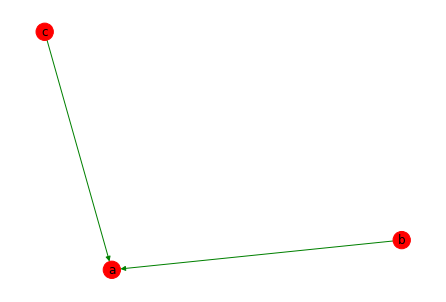

In [ ]:
### Simple tests for AND nodes. 4 points. 
def assert_equal(a, b):
  assert a == b

s = AND_OR_Scheduler()
s.add_and_task('a', ['b', 'c'])
# s.add_or_task('b', ['d', 'e'])
s.show()

assert_equal(s.available_tasks, {'b', 'c'})
r = s.mark_completed('b')
assert_equal(r, set())
assert_equal(s.available_tasks, {'c'})
r = s.mark_completed('c')
assert_equal(r, {'a'})
assert_equal(s.available_tasks, {'a'})
r = s.mark_completed('a')
assert_equal(r, set())
assert_equal(s.available_tasks, set())

### Hidden tests.  6 points. 


# Then, some simple tests for OR nodes.

In [ ]:
### Simple tests for OR nodes. 4 points. 

def assert_equal(a, b):
    assert a == b

s = AND_OR_Scheduler()
s.add_or_task('a', ['b', 'c'])
assert_equal(s.available_tasks, {'b', 'c'})
r = s.mark_completed('b')
# Now 'a' becomes available.
assert_equal(r, {'a'})
# But note that 'c' is also available, even if useless.
assert_equal(s.available_tasks, {'a', 'c'})
r = s.mark_completed('a')
assert_equal(r, set())
print(s.available_tasks)
assert_equal(s.available_tasks, {'c'})
r = s.mark_completed('c')
print(r)
assert_equal(r, set())
assert_equal(s.available_tasks, set())

### Hidden tests.  6 points. 


{'c'}
set()


Note that a drawback of this simple solution, as illustrated by the above test case, is that we do not distinguish between the tasks that are useful to do the root task, and the tasks that are useless, that is, not part of a minimal solution. We simply call them available, as they can be done, even though there is no advantage in doing them.

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:478: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:714: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  arrow_colors = colorConverter.to_rgba_array(edge_color, alpha)


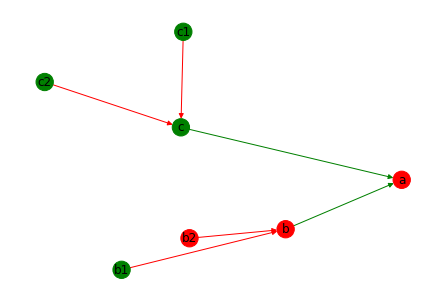

defaultdict(<class 'set'>, {'a': {'c', 'b'}, 'b': {'b1', 'b2'}, 'c': {'c1', 'c2'}})


In [ ]:
### Tests with both AND and OR nodes. 5 points. 
def assert_equal(a, b):
    assert a == b
    
s = AND_OR_Scheduler()
s.add_and_task('a', ['b', 'c'])
s.add_or_task('b', ['b1', 'b2'])
s.add_or_task('c', ['c1', 'c2'])
r = s.mark_completed('b1')
assert_equal(s.available_tasks, {'b', 'b2', 'c1', 'c2'})
r = s.mark_completed('b')
assert 'a' not in s.available_tasks
r = s.mark_completed('c1')
assert 'a' not in s.available_tasks
r = s.mark_completed('c')
assert 'a' in s.available_tasks

s = AND_OR_Scheduler()
s.add_or_task('a', ['b', 'c'])
s.add_and_task('b', ['b1', 'b2'])
s.add_and_task('c', ['c1', 'c2'])
r = s.mark_completed('b1')
assert_equal(s.available_tasks, {'b2', 'c1', 'c2'})
r = s.mark_completed('c1')
assert_equal(s.available_tasks, {'b2', 'c2'})
r = s.mark_completed('c2')
assert_equal(s.available_tasks, {'b2', 'c'})
r = s.mark_completed('c')
assert 'a' in s.available_tasks
s.show()
print(s.predecessors)


### Hidden tests.  5 points. 
